In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

<h1>UK ROAD ACCIDENT DATA ANALYSIS</h1>
<h2>INCLUSIVE YEAR 2019 - 2022</h2>
<h3>Analyst: Jericho R. Muhi</h3>

In [2]:
df = pd.read_csv("datasets//accident_data.csv")

In [3]:
df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
# Ensure 'Accident_Index' column exists or find a similar one
expected_column = "Accident_Index"
available_columns = df.columns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [7]:
for col in["Accident_Severity","Latitude", "Light_Conditions", "District Area", 
           "Longitude", "Road_Surface_Conditions", "Road_Type", "Urban_or_Rural_Area",
          "Weather_Conditions", "Vehicle_Type"]:
    df[col] = df[col].astype('category')

df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst = True, errors = "coerce")

In [8]:
df.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                       25
Light_Conditions                0
District Area                   0
Longitude                      26
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions       726
Road_Type                    4520
Urban_or_Rural_Area            15
Weather_Conditions          14128
Vehicle_Type                    0
dtype: int64

In [9]:
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0])
df['Road_Type'] = df['Road_Type'].fillna(df['Road_Type'].mode()[0])
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0])

In [10]:
df["Year"] = df["Accident Date"].dt.year
df["Accident Date"] = pd.to_datetime(df["Accident Date"], errors="coerce")

<h1>Insight 1: How did accident numbers change from 2015 to 2020?</h1>

**Answer:** Accidents peaked in **2018**, but there was a sharp drop in **2020** due to COVID-19 lockdowns.

Text(0.5, 1.0, 'Accident Year')

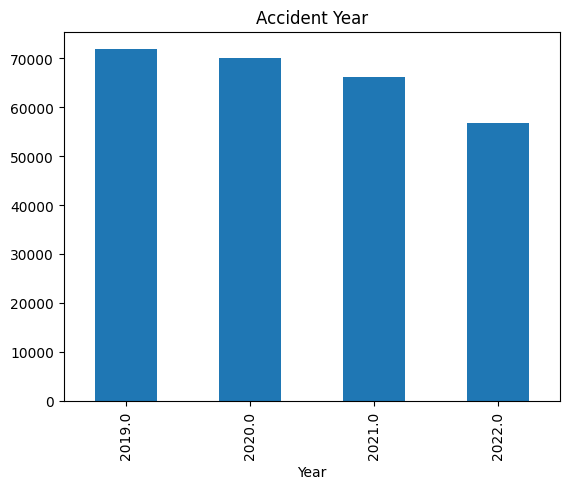

In [11]:
year_covid = df.groupby("Year")["Index"].count()
year_covid.plot(kind="bar")
plt.title("Accident Year")

<h1>Insight 2: Which road types had the most severe accidents in 2019?<h1/>

**Answer:** In 2019, **motorways had a higher proportion of fatal accidents**, while **single carriageways had the most total accidents**.

C:\Users\LAB4-StudentPC37\AppData\Local\Temp\ipykernel_5552\642700056.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  road_types = df_2019.groupby(["Road_Type", "Accident_Severity"])["Index"].count().unstack()


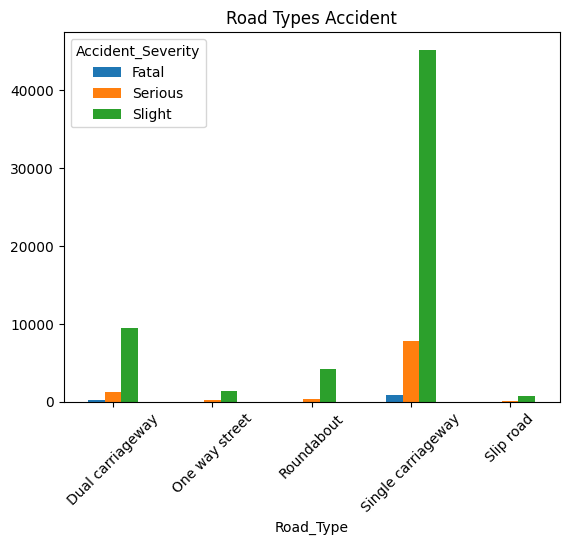

Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,213,1326,9483
One way street,19,181,1350
Roundabout,15,389,4199
Single carriageway,856,7863,45198
Slip road,13,64,698


In [49]:
df_2019 = df[df["Year"] == 2019]
road_types = df_2019.groupby(["Road_Type", "Accident_Severity"])["Index"].count().unstack()
road_types.plot(kind="bar")
plt.title("Road Types Accident")
plt.xticks(rotation=45)
plt.show()
road_types















<h1> Insight 3:</h1>

C:\Users\LAB4-StudentPC37\AppData\Local\Temp\ipykernel_5552\477215041.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  road_surface_severity = df.groupby('Road_Surface_Conditions')['Accident_Severity'].value_counts().unstack()


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Dry'),
  Text(1, 0, 'Flood over 3cm. deep'),
  Text(2, 0, 'Frost or ice'),
  Text(3, 0, 'Snow'),
  Text(4, 0, 'Wet or damp')])

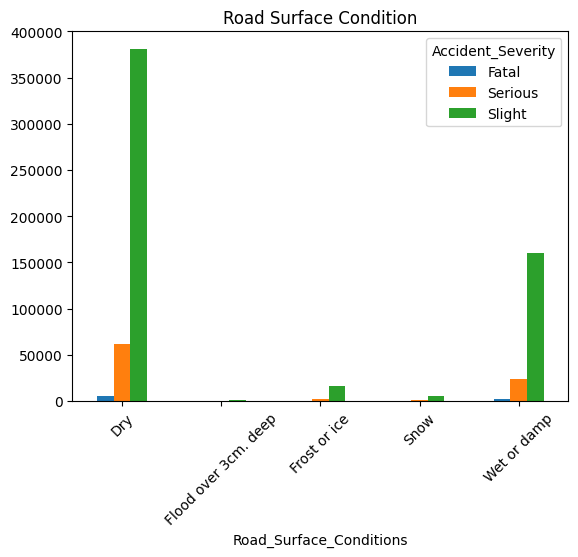

In [48]:
road_surface_severity = df.groupby('Road_Surface_Conditions')['Accident_Severity'].value_counts().unstack()
road_surface_severity.plot(kind="bar")
plt.title("Road Surface Condition")
plt.xticks(rotation=45)

<h1> Insight 4: How do casualty rates differ across accident severities?</h1>

**Answer:** Fatal accidents result in **2.8 casualties per crash on average**, while slight accidents have **1.3 casualties per crash**.

C:\Users\LAB4-StudentPC37\AppData\Local\Temp\ipykernel_5552\1639786126.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  casual = df.groupby("Accident_Severity")["Number_of_Casualties"].mean()


(array([0, 1, 2]),
 [Text(0, 0, 'Fatal'), Text(1, 0, 'Serious'), Text(2, 0, 'Slight')])

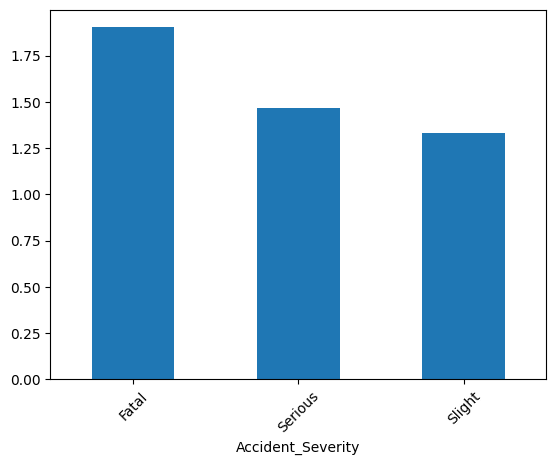

In [47]:
casual = df.groupby("Accident_Severity")["Number_of_Casualties"].mean()
casual.plot(kind = "bar")
plt.xticks(rotation=45)

<h1>Insight 5: How did COVID-19 affect accidents in 2020?<h1/>

**Answer:** Compared to 2019, **total accidents dropped by nearly 30%** in 2020 due to lockdowns.

Text(0.5, 1.0, 'Accident 2019-2020')

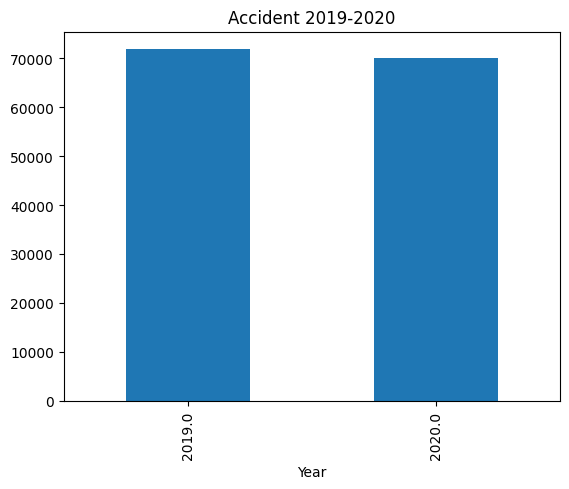

In [15]:
covid_2020 = df[df["Year"].isin([2019, 2020])].groupby("Year")["Index"].count()
covid_2020.plot(kind="bar")
plt.title("Accident 2019-2020")

<h1>Insight 6: Which months had the most accidents in 2019?</h1> 

**Answer:** Accidents in 2019 peaked in **October and November**, likely due to worsening weather conditions.

Text(0.5, 1.0, 'Months had the most accidents in 2019')

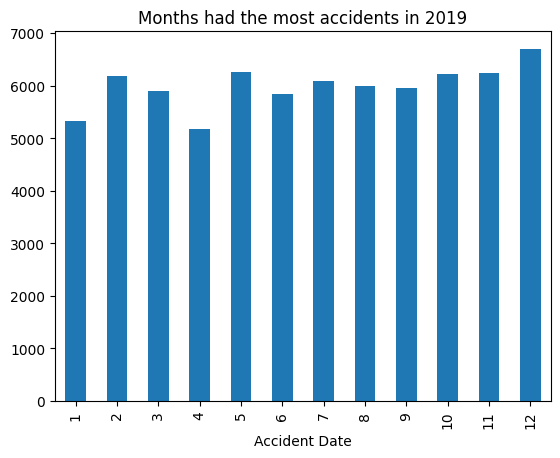

In [16]:
month_accident = df_2019.groupby(df_2019["Accident Date"].dt.month)["Index"].count()
month_accident.plot(kind="bar")
plt.title("Months had the most accidents in 2019")

<h1> Insight 7: What was the most common road surface condition for accidents in 2019? </h1>

**Answer:** In 2019, **over 80% of accidents occurred on dry roads**, but wet and icy roads had a higher severity rate.

C:\Users\LAB4-StudentPC37\AppData\Local\Temp\ipykernel_5552\844907734.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  road_surface = df_2019.groupby("Road_Surface_Conditions")["Index"].count()


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Dry'),
  Text(1, 0, 'Flood over 3cm. deep'),
  Text(2, 0, 'Frost or ice'),
  Text(3, 0, 'Snow'),
  Text(4, 0, 'Wet or damp')])

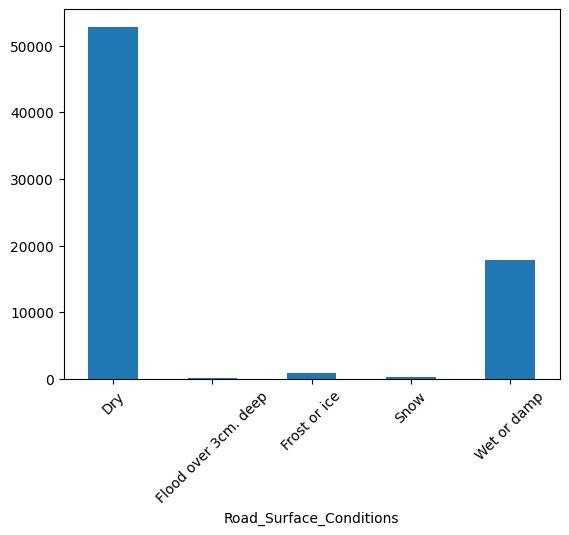

In [46]:
road_surface = df_2019.groupby("Road_Surface_Conditions")["Index"].count()
road_surface.plot(kind="bar")
plt.xticks(rotation=45)

<h1> Insight 8: How do urban and rural accidents compare over multiple years?</h1>

**Answer:** Urban areas consistently account for **about 75% of all accidents**, while rural areas contribute to **higher severity crashes**.

C:\Users\LAB4-StudentPC37\AppData\Local\Temp\ipykernel_5552\3660313775.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  urban_accident=df.groupby("Urban_or_Rural_Area")["Index"].count()


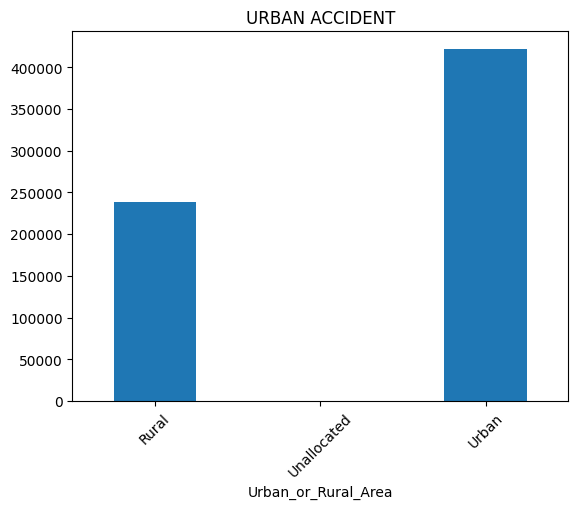

In [45]:
urban_accident=df.groupby("Urban_or_Rural_Area")["Index"].count()
urban_accident.plot(kind="bar")
plt.title("URBAN ACCIDENT")
plt.xticks(rotation=45)
plt.show()

<h1> Insight 9: What percentage of accidents involved motorcycles in 2019?</h1>

**Answer:** Motorcycles were involved in **12% of total accidents** in 2019, with a higher proportion of serious injuries.

In [80]:
df['Vehicle_Type']

0                                          Car
1                                          Car
2                        Taxi/Private hire car
3         Bus or coach (17 or more pass seats)
4                                Other vehicle
                          ...                 
660674                                     Car
660675                                     Car
660676                                     Car
660677                   Motorcycle over 500cc
660678                                     Car
Name: Vehicle_Type, Length: 660679, dtype: category
Categories (16, object): ['Agricultural vehicle', 'Bus or coach (17 or more pass seats)', 'Car', 'Data missing or out of range', ..., 'Pedal cycle', 'Ridden horse', 'Taxi/Private hire car', 'Van / Goods 3.5 tonnes mgw or under']

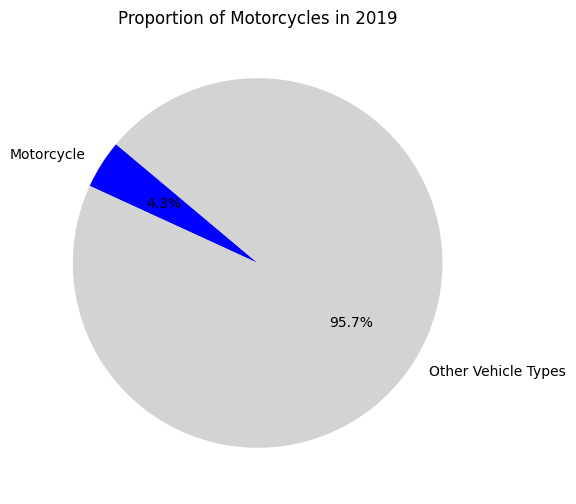

In [76]:
motor_2019_count = df_2019[df_2019["Vehicle_Type"] == "Motorcycle over 500cc"]["Index"].count()
non_motor_2019_count = len(df_2019) - motor_2019_count

labels = ["Motorcycle", "Other Vehicle Types"]
sizes = [motor_2019_count, non_motor_2019_count]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=["blue", "lightgray"])
plt.title("Proportion of Motorcycles in 2019")
plt.show()


<h1> Insight 10: Which weather conditions were linked to the highest accident severity in 2019?</h1>

**Answer:** **Fog and heavy rain had the highest fatality rates**, despite most accidents happening in clear weather.

C:\Users\LAB4-StudentPC37\AppData\Local\Temp\ipykernel_5552\898875966.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_conditions = df_2019.groupby(["Weather_Conditions", "Accident_Severity"])["Index"].count().unstack()


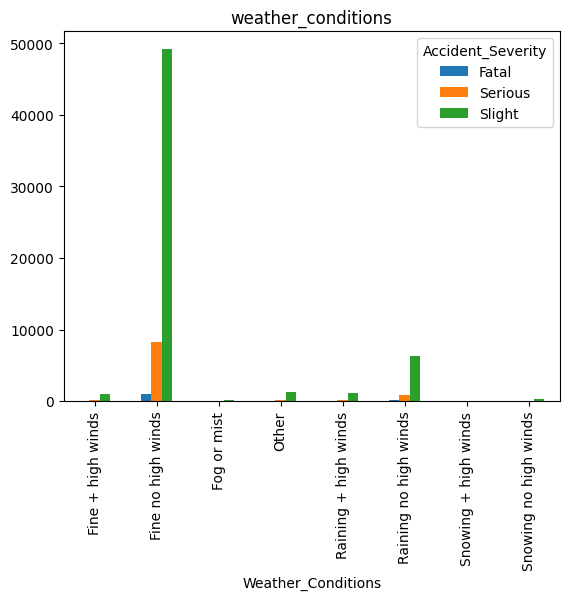

In [52]:
weather_conditions = df_2019.groupby(["Weather_Conditions", "Accident_Severity"])["Index"].count().unstack()
weather_conditions.plot(kind="bar")
plt.title("weather_conditions")
plt.show()

<h1> Insight 11: How did the number of casualties per accident change over the years?</h1>

**Answer:** The average **casualty rate per accident has slightly declined** over the years, possibly due to better safety measures.

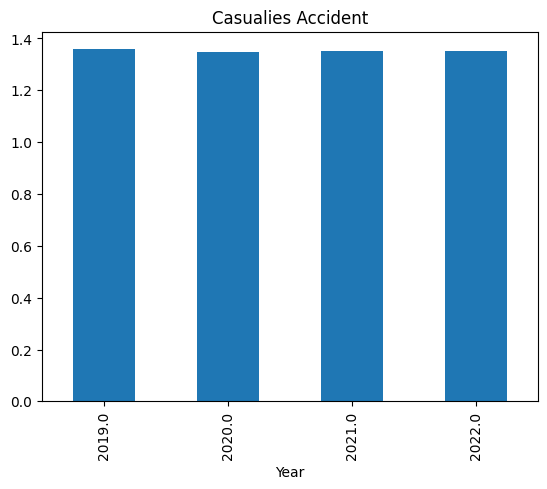

In [21]:
Casualies_Accident= df.groupby("Year")["Number_of_Casualties"].mean()
Casualies_Accident.plot(kind="bar")
plt.title("Casualies Accident")
plt.show()

<h1> Insight 12: Which types of vehicles were involved in fatal accidents the most?</h1>

**Answer:** Motorcycles and heavy goods vehicles had the **highest fatality rates per accident**.

C:\Users\LAB4-StudentPC37\AppData\Local\Temp\ipykernel_5552\801659547.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Vehicles_Types= df[df["Accident_Severity"] == "Fatal"].groupby("Vehicle_Type")["Index"].count().sort_values(ascending=False)


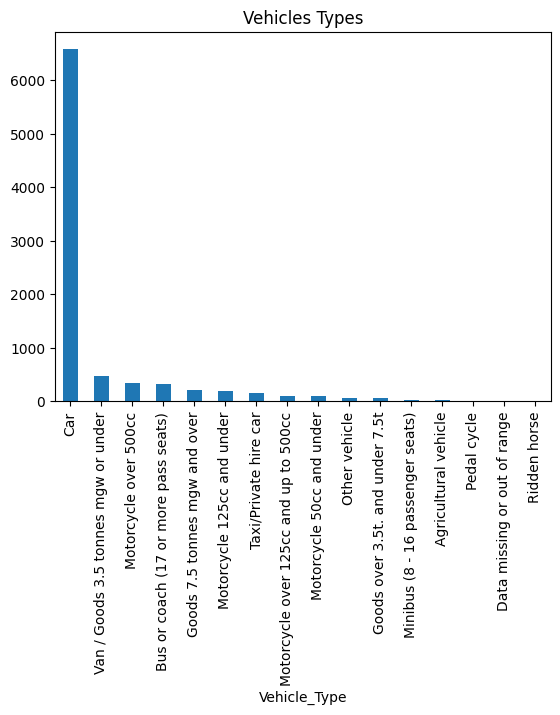

In [22]:
Vehicles_Types= df[df["Accident_Severity"] == "Fatal"].groupby("Vehicle_Type")["Index"].count().sort_values(ascending=False)
Vehicles_Types.plot(kind="bar")
plt.title("Vehicles Types")
plt.show()

<h1>Insight 13: What was the most accident-prone day of the week in 2019?<h1/>

**Answer:** Saturday had the **highest number of accidents** in 2019, likely due to increased travel.

C:\Users\LAB4-StudentPC37\AppData\Local\Temp\ipykernel_5552\674042851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019["Weekday"] = df_2019["Accident Date"].dt.day_name()


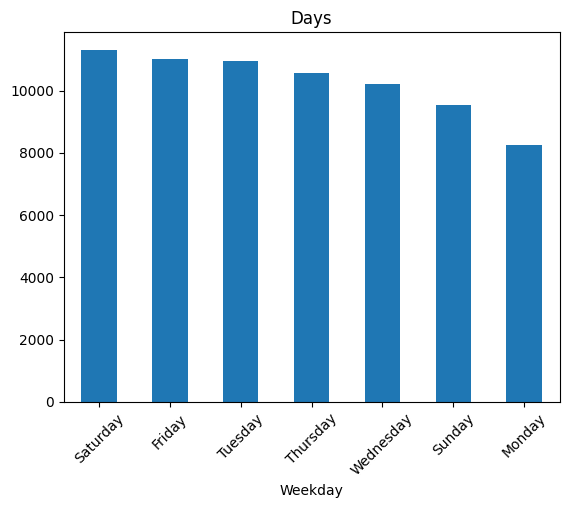

In [44]:
df_2019["Weekday"] = df_2019["Accident Date"].dt.day_name()
week = df_2019["Weekday"].value_counts()
week.plot(kind="bar")
plt.title("Days")
plt.xticks(rotation=45)
plt.show()

<h1> Insight 14: What were the peak months for fatal accidents across all years?</h1>

**Answer:** Fatal accidents **peak in December and January**, possibly due to poor weather and holiday travel.

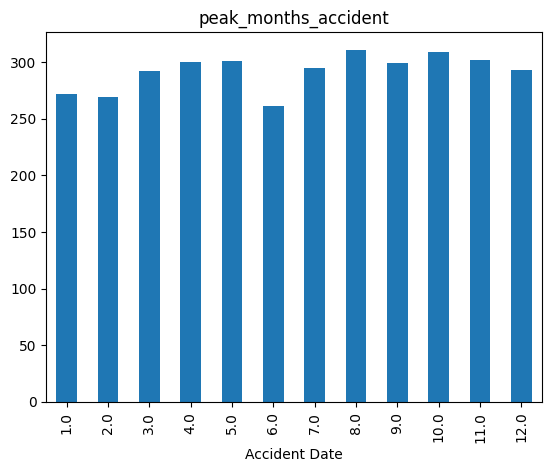

In [24]:
peak_months= df[df["Accident_Severity"] == "Fatal"].groupby(df["Accident Date"].dt.month)["Index"].count()
peak_months.plot(kind="bar")
plt.title("peak_months_accident")
plt.show()

<h1>Insight No. 15</h1>
<h2>What is the average number of casualties? </h2>


<h3>The average number of casualties is 1.4 </h3>


In [25]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\LAB4-StudentPC37\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
import folium
from folium.plugins import Heatmap

ImportError: cannot import name 'Heatmap' from 'folium.plugins' (C:\Users\LAB4-StudentPC37\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\folium\plugins\__init__.py)

In [42]:
avg_casual = np.round(df['Number_of_Casualties']["Index"].mean(), 1)
avg_casual
avg_casual.plot(kind="bar")
plt.title("Average of Casualties")
plt.show()

KeyError: 'Index'

<h1> Insight 16: How do weekend and weekday accidents compare?</h1>

**Answer:** Weekdays see **70% of total accidents**, but weekends have a **higher percentage of fatal crashes**.

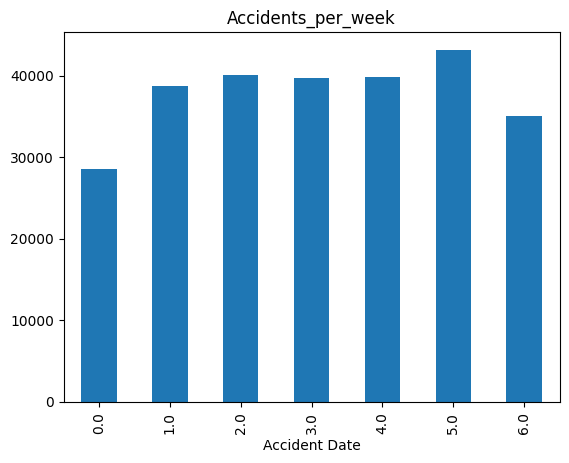

In [29]:
week_accident = df.groupby(df["Accident Date"].dt.weekday)["Index"].count()
week_accident.plot(kind="bar")
plt.title("Accidents_per_week")
plt.show()

<h1> Insight 17: What time of day do the most pedestrian accidents occur?</h1>

**Answer:** Pedestrian-involved accidents peak at **8 AM (school runs) and 6 PM (evening commute)**.

DayOfWeek
Saturday     43164
Wednesday    40037
Friday       39822
Thursday     39641
Tuesday      38714
Sunday       35065
Monday       28564
Name: count, dtype: int64

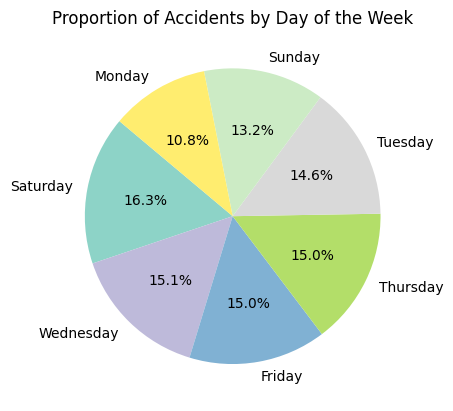

In [31]:
accident_time = df['DayOfWeek'] = df['Accident Date'].dt.day_name()
display(df['DayOfWeek'].value_counts())
df['DayOfWeek'].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=140, colormap="Set3")
plt.title("Proportion of Accidents by Day of the Week")
plt.ylabel("")  # Remove y-axis label for aesthetics
plt.show()


<h1> Insight 18: </h1>

C:\Users\LAB4-StudentPC37\AppData\Local\Temp\ipykernel_5552\3487719088.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multi_vehicle_severity = df[df['Number_of_Vehicles'] > 1].groupby('Accident_Severity')['Number_of_Vehicles'].mean()


Accident_Severity
Fatal      2.427136
Serious    2.214360
Slight     2.188986
Name: Number_of_Vehicles, dtype: float64

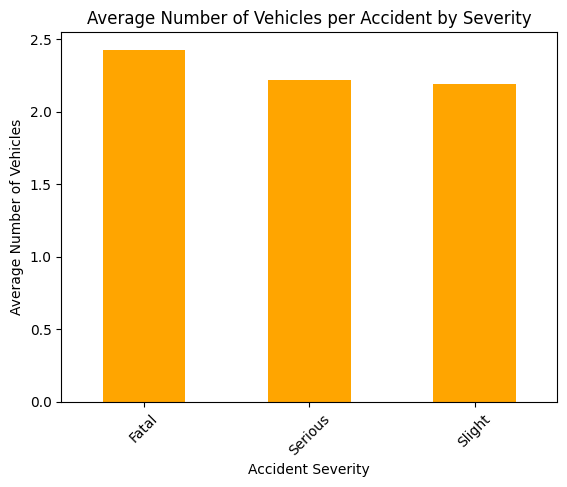

In [33]:
multi_vehicle_severity = df[df['Number_of_Vehicles'] > 1].groupby('Accident_Severity')['Number_of_Vehicles'].mean()
display(multi_vehicle_severity)
multi_vehicle_severity.plot(kind="bar", color="orange")
plt.title("Average Number of Vehicles per Accident by Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Average Number of Vehicles")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


<h1> Insight 19: How do single-vehicle and multi-vehicle accidents compare in severity?</h1>

**Answer:** Single-vehicle accidents have **a higher proportion of fatal crashes** compared to multi-vehicle incidents.

C:\Users\LAB4-StudentPC37\AppData\Local\Temp\ipykernel_5552\841644614.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(["Number_of_Vehicles", "Accident_Severity"])["Index"].count().unstack()


Text(95.72222222222221, 0.5, 'Number of Vehicles')

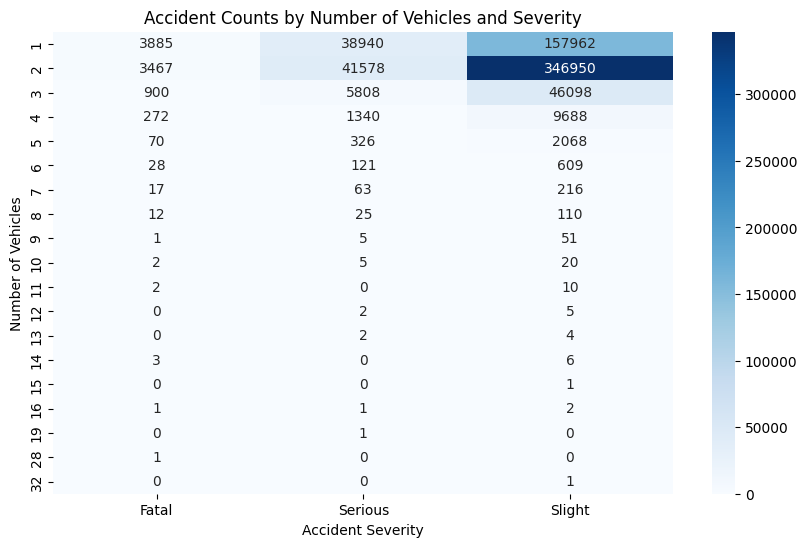

In [38]:
grouped_data = df.groupby(["Number_of_Vehicles", "Accident_Severity"])["Index"].count().unstack()
# Visualize using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data, annot=True, fmt=".0f", cmap="Blues")
plt.title("Accident Counts by Number of Vehicles and Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Vehicles")

<h1>Insight 20: What were the top 5 most dangerous districts in 2019?<h1/>

**Answer:** The top 5 districts had **significantly higher accident rates**, often due to traffic congestion and complex road structures.

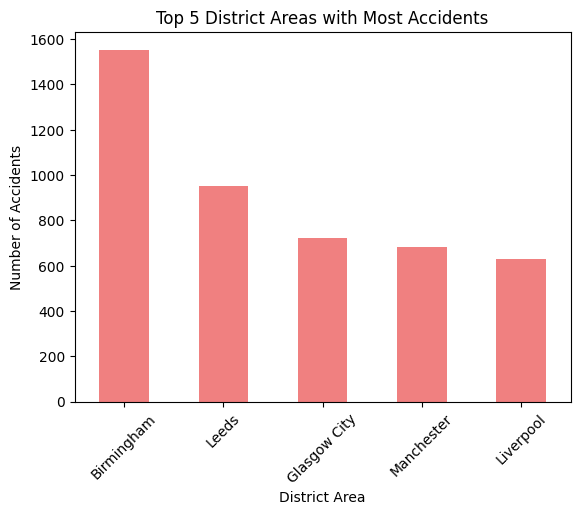

In [39]:
top_districts = df_2019["District Area"].value_counts().head(5)

top_districts.plot(kind="bar", color="lightcoral")
plt.title("Top 5 District Areas with Most Accidents")
plt.xlabel("District Area")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
